假设观测特征变量与观测标签之间的因果关系为: $y = 2x_1^2 - x_2^2$

In [154]:
torch.manual_seed(55)

# 加载原始数据集(观测特征变量与观测标签)
X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
train_dataset, test_dataset = split_loader(X=X, y=y)

In [202]:
torch.manual_seed(420)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu3 = GeoffNetReLU3(bias=False)

In [203]:
# 训练模型
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, model=net_relu3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_relu3.parameters(), lr=0.03), task="reg", evaluation=calc_mse)

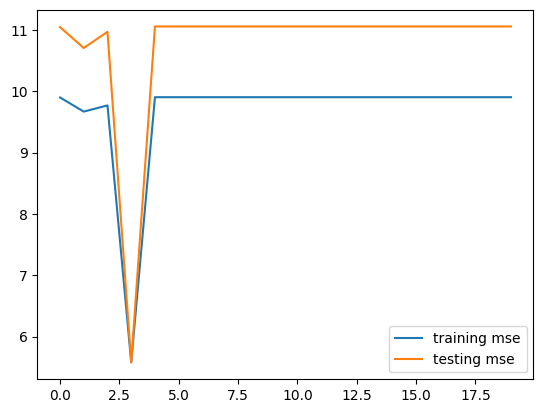

In [205]:
# 绘制训练完成的模型在训练数据集和测试数据集上的模型评估性能指标的变化情况
plt.plot(list(range(20)), losses_train, label="training mse")
plt.plot(list(range(20)), losses_test, label="testing mse")
plt.legend(loc="lower right")
plt.show()

In [206]:
net_relu3(X)

tensor([[ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0

In [207]:
# 在计算机的内存中一次性存储多个数值. 多个数值具有一定的规律. 取值从[-5, 5)每间隔0.1取出一个数
x = torch.arange(start=-5, end=5, step=0.1)
x.requires_grad = True

假设因变量y和自变量x之间满足函数关系: $y = \text relu(x)$

In [208]:
y = torch.relu(x)

Text(0.5, 1.0, 'relu function')

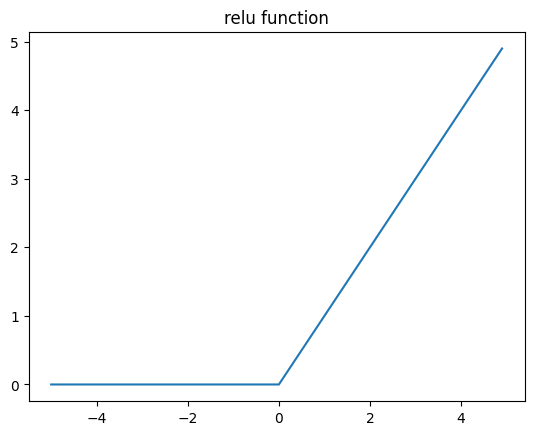

In [209]:
# 绘制自变量x和因变量y之间的函数关系对应的图像. 在当前取值范围中
plt.plot(x.detach(), y.detach())
plt.title("relu function")
plt.show()

计算因变量y和自变量x之间的函数关系对应的函数的导函数表达式: $y' = \text relu'(x)$

In [210]:
y.sum().backward()  # 先计算导函数表达式, 再代入对应点处的x的取值得到导函数的函数值

Text(0.5, 1.0, 'relu derivative function')

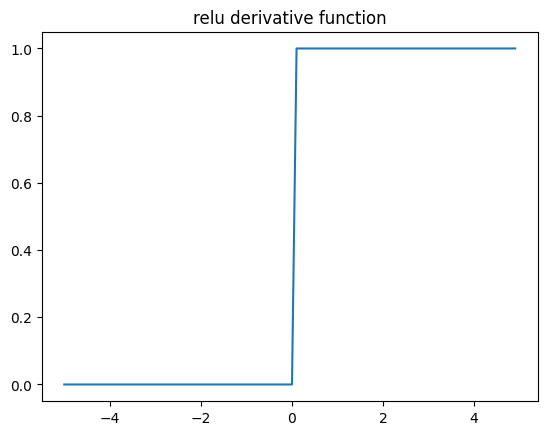

In [211]:
# 绘制自变量x和因变量y之间的导函数关系对应的图像. 在当前取值范围中
plt.plot(x.detach(), x.grad.detach())  # x.grad 以x为自变量的函数在该点处的导函数值
plt.title("relu derivative function")
plt.show()

In [212]:
# 在计算机的内存中一次性存储多个数值, 且数值是由User随机指定的
w1 = torch.tensor([[0., 0], [-1, -2]], requires_grad=True, dtype=torch.float32)
w1

tensor([[ 0.,  0.],
        [-1., -2.]], requires_grad=True)

In [213]:
w2 = torch.tensor([1., -1], requires_grad=True, dtype=torch.float32).reshape(-1, 1)
w2

tensor([[ 1.],
        [-1.]], grad_fn=<ViewBackward0>)

In [214]:
w2 = torch.tensor([1., -1], dtype=torch.float32).reshape(-1, 1)
w2.requires_grad = True
w2

tensor([[ 1.],
        [-1.]], requires_grad=True)

In [215]:
f = torch.tensor([[1, 2.]], requires_grad=False)
f

tensor([[1., 2.]])

In [216]:
# 输入层 -> 隐藏层第一层: 加工信息
f2 = torch.mm(f, w1)
f2

tensor([[-2., -4.]], grad_fn=<MmBackward0>)

In [217]:
# 输入层 -> 隐藏层第一层: 整合信息
f3 = torch.relu(f2)
f3

tensor([[0., 0.]], grad_fn=<ReluBackward0>)

In [218]:
# 隐藏层第一层 -> 输出层: 加工信息
out = torch.mm(f3, w2)
out  # 模型的预测输出标记

tensor([[0.]], grad_fn=<MmBackward0>)

In [219]:
# 假设该样本的真实标签为l
l = torch.tensor([3.], dtype=torch.float32)
l

tensor([3.])

In [220]:
# 计算模型的预测输出标记和标签之间的误差
loss = F.mse_loss(out, l)
loss

/var/folders/ht/7tjg01r945gch9nd9n7s7c3c0000gn/T/ipykernel_36652/4286545951.py:2: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, l)


tensor(9., grad_fn=<MseLossBackward0>)

In [221]:
loss.backward()

In [222]:
w1.grad

tensor([[0., 0.],
        [0., 0.]])

In [223]:
w2.grad

tensor([[0.],
        [0.]])

In [224]:
dataset_train.dataset[:][0]

tensor([[ 0.1662,  0.2457],
        [-2.3092,  2.1917],
        [-0.2503,  1.6936],
        ...,
        [ 0.8131,  0.9148],
        [-0.9485, -0.1682],
        [ 2.0251,  0.3138]])

In [225]:
# 前向传播
net_relu3(dataset_train.dataset[:][0])

tensor([[ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0

##### 如果一个使用ReLu激活函数作为每一层加工信息的函数的深度神经网络模型的输出结果中0的个数等于样本的个数, 则模型会出现Dead ReLU问题

In [232]:
epsilon = 1e-8
(net_relu3(dataset_train.dataset[:][0]) - 0 <= epsilon).sum()

tensor(700)

In [233]:
len(dataset_train.dataset[:][0])

700

Text(0.5, 1.0, 'learning rate = 0.03')

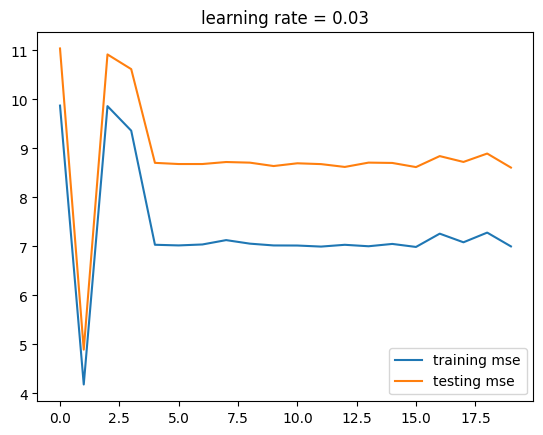

In [235]:
torch.manual_seed(1998)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu3 = GeoffNetReLU3(bias=False)

# 训练模型
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=20, model=net_relu3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_relu3.parameters(), lr=0.03), task="reg", evaluation=calc_mse)

# 绘制训练完成的模型在训练数据集和测试数据集上的模型评估性能指标的变化情况
plt.plot(list(range(20)), losses_train, label="training mse")
plt.plot(list(range(20)), losses_test, label="testing mse")
plt.title("learning rate = 0.03")
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'learning rate = 0.001')

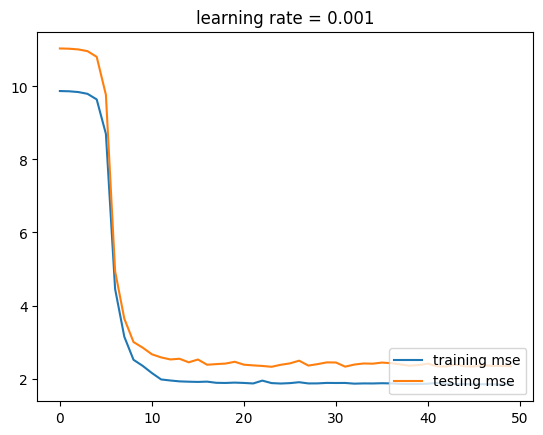

In [243]:
torch.manual_seed(1998)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu3 = GeoffNetReLU3(bias=False)

# 训练模型
losses_train, losses_test = calc_train_test_losses(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=50, model=net_relu3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_relu3.parameters(), lr=0.001), task="reg", evaluation=calc_mse)

# 绘制训练完成的模型在训练数据集和测试数据集上的模型评估性能指标的变化情况
plt.plot(list(range(50)), losses_train, label="training mse")
plt.plot(list(range(50)), losses_test, label="testing mse")
plt.title("learning rate = 0.001")
plt.legend(loc="lower right")
plt.show()

In [242]:
for layers in list(net_relu3.modules())[1:]:
    print(layers.weight.grad)

None
None
None
None


In [245]:
torch.manual_seed(1998)

# 搭建深度神经网络模型的架构
# 搭建深度神经网络模型的架构
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class GeoffNetReLU3(nn.Module):
    
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True):
        super(GeoffNetReLU3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
    
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层 -> 隐藏层第一层
        # 1.整合信息
        z_hat = self.hidden1_linear(X)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第一层 -> 隐藏层第二层
        # 1.整合信息
        z_hat = self.hidden2_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第二层 -> 隐藏层第三层
        # 1.整合信息
        z_hat = self.hidden3_linear(sigma)  # 完成当前层上的计算过程
        # 2.加工信息
        sigma = torch.relu(z_hat)

        # 隐藏层第三层 -> 输出层
        z_hat = self.output_linear(sigma)
        return z_hat

net_relu3 = GeoffNetReLU3(bias=False)

In [249]:
def fit(batched_dataset, n_epochs, model, criterion, optimizer, task="reg"):
        """让模型拟合数据, 在训练过程中更新模型的参数, 使得损失函数值减小, 尽可能最小
        @param n_epochs: 对于一个完整的数据集进行学习的遍数
        @param batched_dataset: 将一个完整的数据集按照指定的样本容量划分为若干个互不相交的子集
        @param model: 模型
        @param criterion: 损失函数
        @param optimizer: 优化器

        @return: 完成训练流程的模型(不一定是性能最好的模型)
        """
        for i_epoch in range(n_epochs):
            for (i_X, i_y) in batched_dataset:
                # 1.前向传播, 计算以当前的模型参数对该批次的数据进行学习, 模型的预测输出标记
                z_hat = model.forward(i_X)
                # 2.计算损失, 计算模型的预测输出标记与真实标签之间的误差, 构建完整的计算图
                if task == "clf":
                    i_y = i_y.flatten().long()

                # 5.清空梯度信息
                optimizer.zero_grad()
                loss = criterion(z_hat, i_y)
                # 3.反向传播, 计算以当前的模型参数对应的偏导函数表达式和值, 以确定各个模型的参数在对应维度上应该向哪个方向进行更新(该维度所在的正方向or负方向)
                loss.backward()
                # 4.更新模型的参数, 优化器根据梯度信息, 计算当前的模型参数在各个维度的已知方向上应该更新的数值
                optimizer.step()

In [251]:
fit(batched_dataset=train_dataset, n_epochs=50, model=net_relu3, criterion=nn.MSELoss(), optimizer=optim.SGD(params=net_relu3.parameters(), lr=0.001), task="reg")

In [252]:
for layers in list(net_relu3.modules())[1:]:
    print(layers.weight.grad)

tensor([[-0.1435, -0.3760],
        [ 3.1096, -0.0308],
        [ 1.2574,  0.0496],
        [-0.3519,  0.8967]])
tensor([[ 0.2274,  1.8509,  0.9465,  0.5005],
        [-0.3152, -0.8983, -0.4576, -0.5381],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.2471,  2.3982,  1.2268,  0.5809]])
tensor([[-0.1160, -0.4276,  0.0000, -0.0201],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.3235,  0.3638,  0.0000,  1.4970],
        [ 0.0285,  0.1116,  0.0000,  0.0031]])
tensor([[0.5127, 0.0000, 1.8016, 0.0266]])


In [283]:
torch.manual_seed(1998)

relu_test = nn.Sequential(
    # 隐藏层第一层: 整合信息
    nn.Linear(in_features=2, out_features=2, bias=False),
    # 隐藏层第一层: 加工信息
    nn.ReLU(),
    # 隐藏层第二层: 整合信息
    # nn.Linear(in_features=2, out_features=2, bias=False),
    # 隐藏层第二层: 加工信息
    # nn.ReLU(),
    # 输出层: 整合信息
    nn.Linear(in_features=2, out_features=1, bias=False)
)

In [254]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[-0.3987, -0.3033],
         [ 0.6250,  0.0214]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1415,  0.6028],
         [ 0.0743, -0.4171]], requires_grad=True),
 Parameter containing:
 tensor([[0.3463, 0.0661]], requires_grad=True)]

In [255]:
type(relu_test)

torch.nn.modules.container.Sequential

In [256]:
isinstance(relu_test, nn.Sequential)

True

In [257]:
isinstance(net_relu3, GeoffNetReLU3)

True

In [258]:
r1 = nn.ReLU()  # relu激活函数计算

In [260]:
t = torch.tensor([1., -1], dtype=torch.float32)
t

tensor([ 1., -1.])

In [261]:
r1(t)

tensor([1., 0.])

In [262]:
torch.relu(t)

tensor([1., 0.])

In [263]:
# 实例化一个样本
f = torch.tensor([[1, 2.]], dtype=torch.float32)
f

tensor([[1., 2.]])

In [264]:
relu_test.forward(f)

tensor([[0.1394]], grad_fn=<MmBackward0>)

In [267]:
list(relu_test.parameters())[0].data

tensor([[-0.3987, -0.3033],
        [ 0.6250,  0.0214]])

In [268]:
list(relu_test.parameters())[0].data.requires_grad

False

In [269]:
list(relu_test.parameters())[0].requires_grad

True

In [270]:
w1 = list(relu_test.parameters())[0].t()
w1

tensor([[-0.3987,  0.6250],
        [-0.3033,  0.0214]], grad_fn=<TBackward0>)

In [271]:
w2 = list(relu_test.parameters())[1].t()
w2

tensor([[ 0.1415,  0.0743],
        [ 0.6028, -0.4171]], grad_fn=<TBackward0>)

In [272]:
# 输入层 -> 隐藏层第一层(整合信息+加工信息) -> 隐藏层第二层(整合信息)
torch.mm(torch.relu(torch.mm(f, w1)), w2)

tensor([[ 0.4025, -0.2785]], grad_fn=<MmBackward0>)

In [274]:
relu_test.parameters()

<generator object Module.parameters at 0x13514c740>

In [275]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[-0.3987, -0.3033],
         [ 0.6250,  0.0214]], requires_grad=True),
 Parameter containing:
 tensor([[0.1415, 0.6028]], requires_grad=True)]

In [276]:
list(relu_test.parameters())[0]

Parameter containing:
tensor([[-0.3987, -0.3033],
        [ 0.6250,  0.0214]], requires_grad=True)

##### 使用自定义参数值修改模型初始化后的参数值

In [277]:
w1 = torch.tensor([[0., 0], [-1, -2]], dtype=torch.float32)
w1

tensor([[ 0.,  0.],
        [-1., -2.]])

In [278]:
w2 = torch.tensor([1., -1], dtype=torch.float32).reshape(-1, 1)
w2

tensor([[ 1.],
        [-1.]])

In [284]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[-0.3987, -0.3033],
         [ 0.6250,  0.0214]], requires_grad=True),
 Parameter containing:
 tensor([[0.1415, 0.6028]], requires_grad=True)]

In [285]:
list(relu_test.parameters())[0].data = w1.t()
list(relu_test.parameters())[1].data = w2.t()

In [286]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0., -1.],
         [ 0., -2.]], requires_grad=True),
 Parameter containing:
 tensor([[ 1., -1.]], requires_grad=True)]

In [287]:
f = torch.tensor([[1, 2.]], dtype=torch.float32)
f

tensor([[1., 2.]])

In [288]:
out = relu_test.forward(f)
out

tensor([[0.]], grad_fn=<MmBackward0>)

In [289]:
l = torch.tensor([[3.]], dtype=torch.float32)
l

tensor([[3.]])

In [290]:
loss = F.mse_loss(out, l)
loss

tensor(9., grad_fn=<MseLossBackward0>)

In [291]:
loss.backward()

In [292]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[ 0., -1.],
         [ 0., -2.]], requires_grad=True),
 Parameter containing:
 tensor([[ 1., -1.]], requires_grad=True)]

In [293]:
list(relu_test.parameters())[0].grad

tensor([[0., 0.],
        [0., 0.]])

In [294]:
list(relu_test.parameters())[1].grad

tensor([[0., 0.]])

In [296]:
torch.manual_seed(1998)

relu_test = nn.Sequential(
    # 隐藏层第一层: 整合信息
    nn.Linear(in_features=2, out_features=2, bias=False),
    # 隐藏层第一层: 加工信息
    nn.ReLU(),
    # 隐藏层第二层: 整合信息
    # nn.Linear(in_features=2, out_features=2, bias=False),
    # 隐藏层第二层: 加工信息
    # nn.ReLU(),
    # 输出层: 整合信息
    nn.Linear(in_features=2, out_features=1, bias=False)
)

In [297]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[-0.3987, -0.3033],
         [ 0.6250,  0.0214]], requires_grad=True),
 Parameter containing:
 tensor([[0.1415, 0.6028]], requires_grad=True)]

In [299]:
nn.init.uniform_(tensor=relu_test.parameters(), a=0.0, b=1.0)

AttributeError: 'generator' object has no attribute 'uniform_'

In [301]:
list(relu_test.parameters())[0]

Parameter containing:
tensor([[-0.3987, -0.3033],
        [ 0.6250,  0.0214]], requires_grad=True)

In [302]:
nn.init.uniform_(tensor=list(relu_test.parameters())[0], a=0.0, b=1.0)

Parameter containing:
tensor([[0.5525, 0.2051],
        [0.7449, 0.5467]], requires_grad=True)

In [303]:
list(relu_test.parameters())[0]

Parameter containing:
tensor([[0.5525, 0.2051],
        [0.7449, 0.5467]], requires_grad=True)

In [304]:
nn.init.normal_(tensor=list(relu_test.parameters())[0], mean=0.0, std=1.0)

Parameter containing:
tensor([[-0.8969, -1.0338],
        [ 0.5666,  0.2034]], requires_grad=True)

In [305]:
torch.normal(mean=0.0, std=1.0, size=list(relu_test.parameters())[0].size())

tensor([[-2.2068,  0.7276],
        [-0.8945,  0.1135]])

In [306]:
w1 = torch.normal(mean=0.0, std=1.0, size=list(relu_test.parameters())[0].size())
w1.requires_grad = True
w1

tensor([[-1.1887, -1.3509],
        [ 0.5991, -0.8404]], requires_grad=True)

In [307]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[-0.8969, -1.0338],
         [ 0.5666,  0.2034]], requires_grad=True),
 Parameter containing:
 tensor([[0.1415, 0.6028]], requires_grad=True)]

In [310]:
list(relu_test.parameters())[0].data = w1

In [311]:
list(relu_test.parameters())

[Parameter containing:
 tensor([[-1.1887, -1.3509],
         [ 0.5991, -0.8404]], requires_grad=True),
 Parameter containing:
 tensor([[0.1415, 0.6028]], requires_grad=True)]

In [314]:
nn.init.constant_(tensor=list(relu_test.parameters())[0], val=1)

Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
w1 = torch.full_like(mean=0.0, std=1.0, size=list(relu_test.parameters())[0].size())
w1.requires_grad = True
w1